## Probabilistic Learning on Manifolds (Simple example in 20 dimensions)

In this example, raw invented data is used as sample input. This is just a user guide to see how the package and algorithm work and see their possible applications.

The input sample included 300 data points and each features a unique vector of some independent variables and some other linearly related variables. The goal is to use PLoM learn the data structure and generate more samples whose key statistics (i.e., mean and covariance) are consistent with the input sample.

### Import python modules

In [1]:
import numpy as np
import random
import time
from math import pi
import pandas as pd
from ctypes import *
%matplotlib notebook
import matplotlib.pyplot as plt
import sys

### Import PLoM modules

In [2]:
sys.path.insert(1, '../../')
from PLoM import *

### Load Data
Data are loaded via a comma-separate value (csv) file. The first row contains column names for all the variables. The following rows are input sample data. Users are expected to specif the csv filename.

2021-10-25 16:11:50.575594  RUNNING-MSG --NEW LOG STARTING FROM THIS LINE-- 
2021-10-25 16:11:50.577485  RUNNING-MSG PLoM: Running directory /home/javigual/Documents/PLoM/RunDir/Example0_constraints initialized. 
2021-10-25 16:11:50.645358  RUNNING-MSG PLoM: database server initialized. 
2021-10-25 16:11:50.645849  RUNNING-MSG PLoM: visualization folder /home/javigual/Documents/PLoM/RunDir/Example0_constraints/FigOut initialized. 
2021-10-25 16:11:50.648347  RUNNING-MSG PLoM.load_data: loaded data size = (199, 2). 
2021-10-25 16:11:50.705601  RUNNING-MSG PLoM.initialize_data: current X0 size = (199, 2). 
2021-10-25 16:11:50.706135  RUNNING-MSG PLoM.initialize_data: X0 and X0_size saved to database. 


<IPython.core.display.Javascript object>


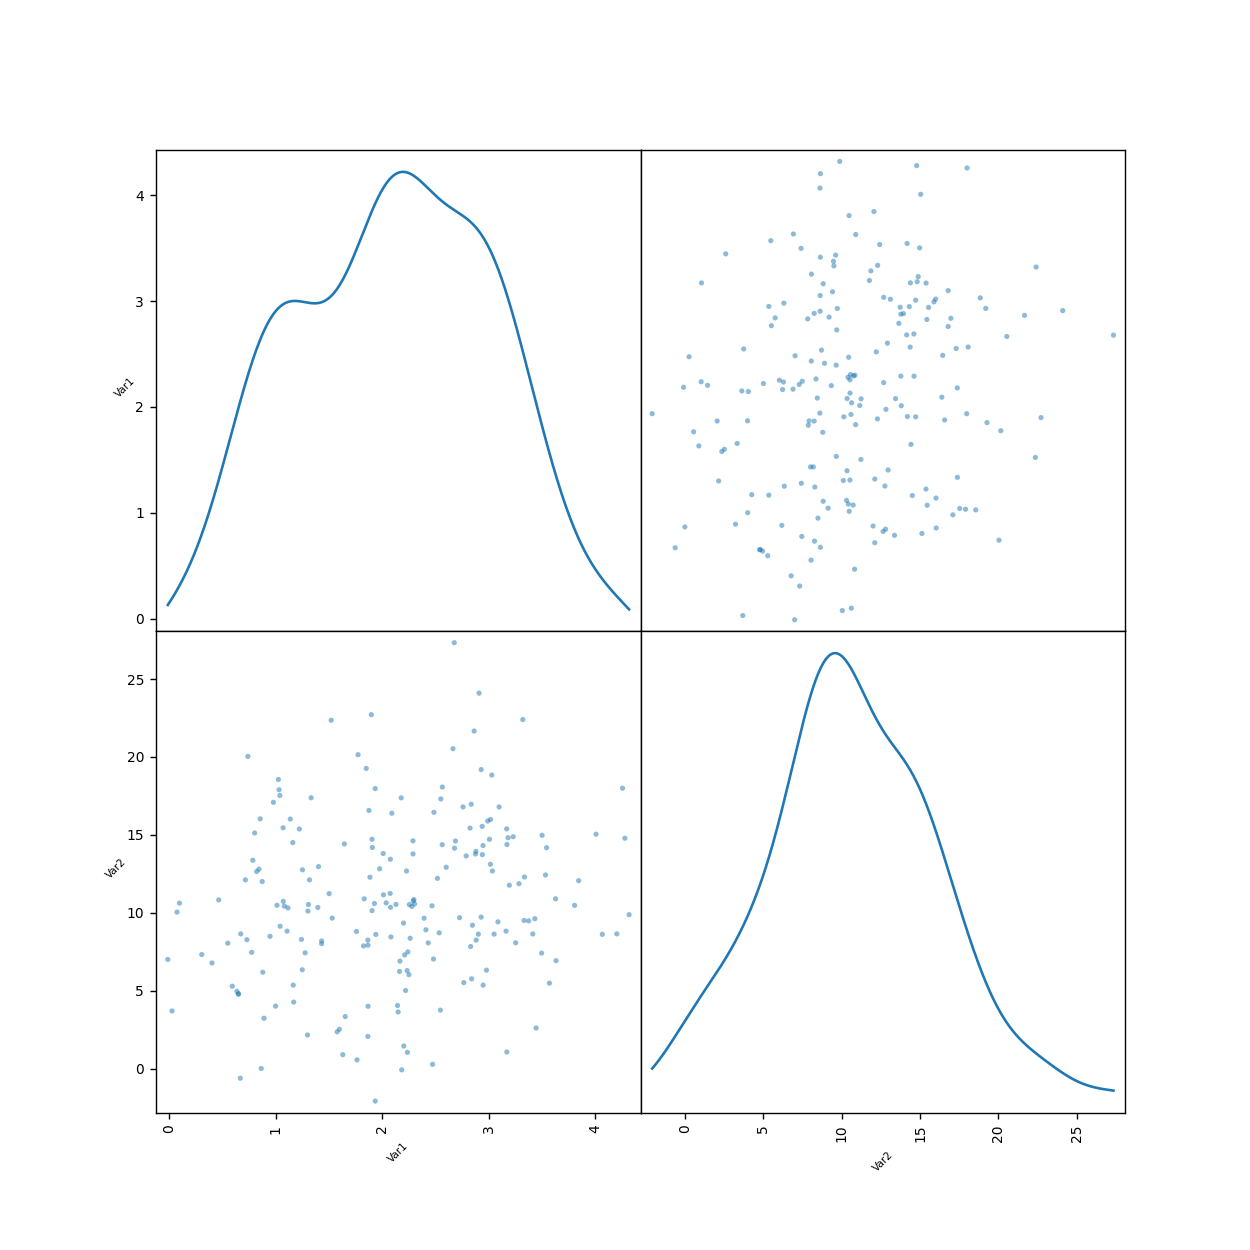

2021-10-25 16:11:52.585202  RUNNING-MSG PLoM: ScatterMatrix_X0.png saved in /home/javigual/Documents/PLoM/RunDir/Example0_constraints/FigOut. 
2021-10-25 16:11:52.585776  WARNING-MSG PLoM.add_constraints: no user-defined constraint - please use add_constraints(constraints_file=X) to add new constraints if any. 
2021-10-25 16:11:52.586111  RUNNING-MSG PLoM: using ConfigTasks(task_list = FULL_TASK_LIST) to schedule a run. 
2021-10-25 16:11:52.586425  RUNNING-MSG PLoM: using RunAlgorithm(n_mc=n_mc,epsilon_pca=epsilon_pca,epsilon_kde) to run simulations. 
2021-10-25 16:11:52.587468  RUNNING-MSG PLoM.add_constraints: constraints added. 


0

In [3]:
# Filename
filename = './data/data_example2D.csv'
model = PLoM(model_name='Example0_constraints', data=filename, col_header=True, plot_tag=True, runDiffMaps = False)
model.add_constraints('./data/constraints_example2D.py')

### Configuring tasks
Please specify tasks to run - the list of tasks can be run in sqeunce or invidivdual tasks can be run separately.

In [4]:
tasks = ['DataNormalization','RunPCA','RunKDE','ISDEGeneration']

### Step 0: Scaling the data

In [5]:
# Configure the task
model.ConfigTasks(['DataNormalization'])
# Launch the run
model.RunAlgorithm()

2021-10-25 16:11:52.797094  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: DataNormalization. 
2021-10-25 16:11:52.797888  RUNNING-MSG PLoM.RunAlgorithm: data normalization completed. 
2021-10-25 16:11:52.859533  RUNNING-MSG PLoM.RunAlgorithm: X_range, X_min, X_scaled and X_scaled_mean saved. 
2021-10-25 16:11:52.900926  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) DataNormalization done. 


### Step 1: Principal Component Analysis (PCA)

2021-10-25 16:11:53.150855  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: RunPCA. 


<IPython.core.display.Javascript object>


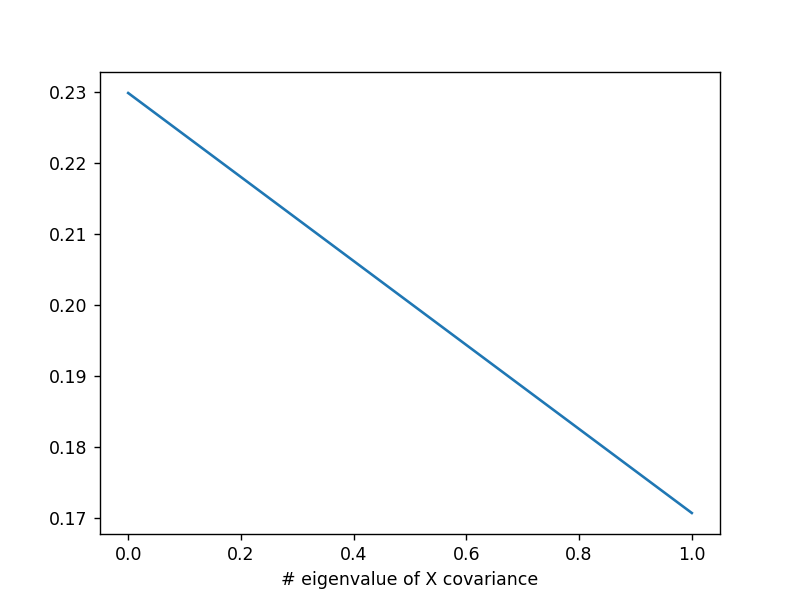

<IPython.core.display.Javascript object>


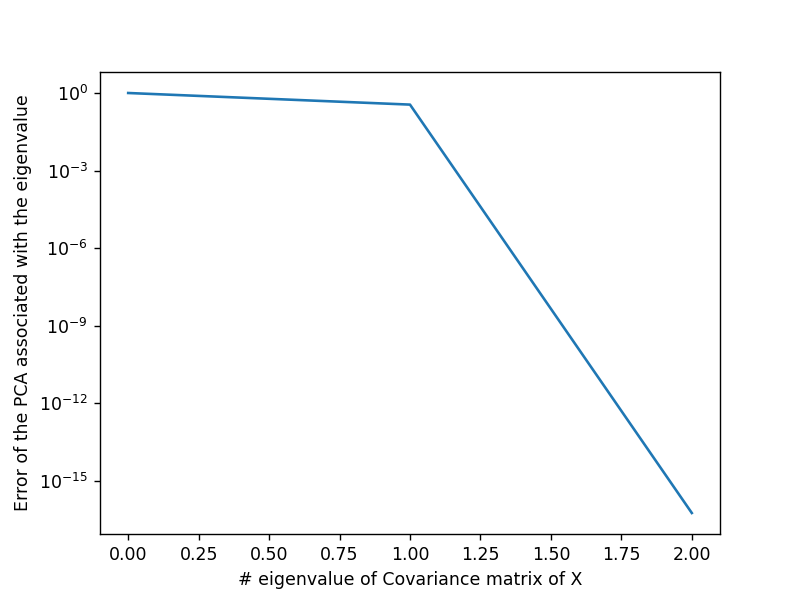

2021-10-25 16:11:53.285796  RUNNING-MSG PLoM.RunPCA: considered number of PCA components = 2 


<IPython.core.display.Javascript object>


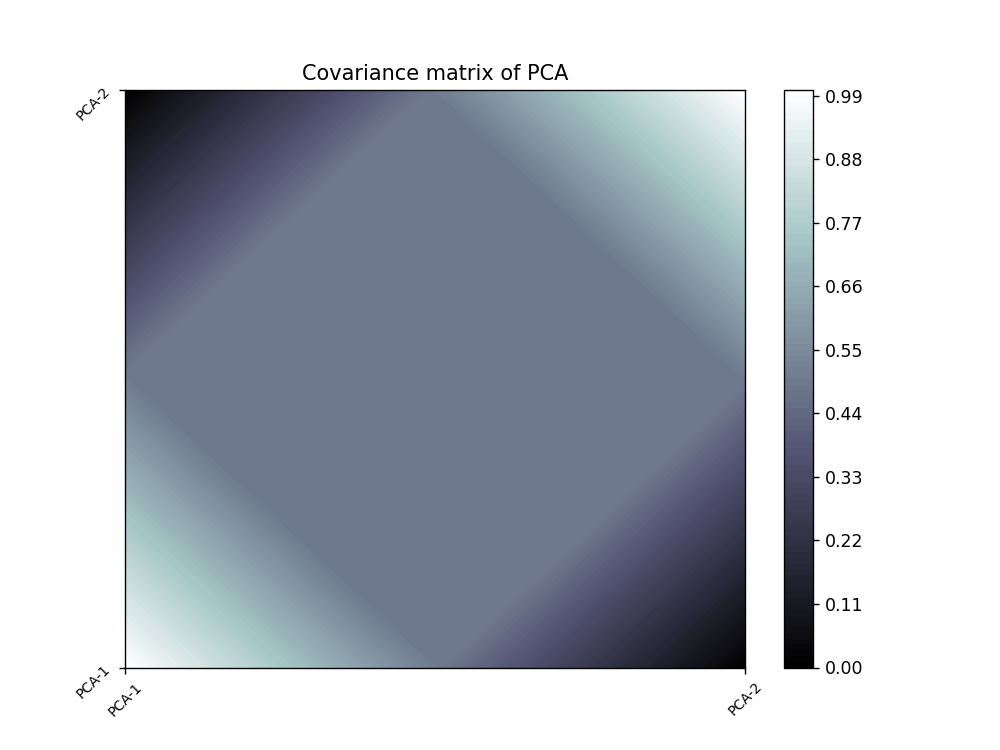

2021-10-25 16:11:55.239780  RUNNING-MSG PLoM: PCA_CovarianceMatrix.png saved in /home/javigual/Documents/PLoM/RunDir/Example0_constraints/FigOut. 
2021-10-25 16:11:55.242533  RUNNING-MSG PLoM.RunAlgorithm: PCA completed. 
2021-10-25 16:11:55.471462  RUNNING-MSG PLoM.RunAlgorithm: X_PCA, EigenValue_PCA and EigenVector_PCA saved. 
2021-10-25 16:11:55.575450  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) RunPCA done. 


In [6]:
# Tolerance for truncating principal components
tol_pca = 1e-12
# Configure the task
model.ConfigTasks(['RunPCA'])
# Launch the run
model.RunAlgorithm(epsilon_pca=tol_pca)

### Step 2: Kernel Density Estimation (KDE)

In this step there is an optional argument for the RunAlgorithm process that involves the diffusion maps basis. This step can both be run or not, anddepending on the requirements it can be neglected. It can be noted that the default value of *runDiffMaps* is *True*.

In [7]:
# Smoothing parameter in the KDE
sp = 25
# Configure the task
model.ConfigTasks(['RunKDE'])

# Launch the run
model.RunAlgorithm(epsilon_kde=sp)

2021-10-25 16:11:56.687486  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: RunKDE. 
2021-10-25 16:11:57.181786  RUNNING-MSG PLoM.RunAlgorithm: kernel density estimation completed. 
2021-10-25 16:11:57.247557  RUNNING-MSG PLoM.RunAlgorithm: KDE, X_KDE and EigenValues_KDE saved. 
2021-10-25 16:11:57.250774  RUNNING-MSG PLoM.RunAlgorithm: diffusion map is inactivated. 
2021-10-25 16:11:57.306113  RUNNING-MSG PLoM.RunAlgorithm: KDE_g, KDE_m, KDE_a and KDE_Z saved. 
2021-10-25 16:11:57.595003  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) RunKDE done. 


### Step 3: Create the generator

In [8]:
# Extra parameters for ISDE generation
new_sample_num_ratio = 10
tol_PCA2 = 1e-5
# Configure the task
model.ConfigTasks(['ISDEGeneration'])
# Launch the run
model.RunAlgorithm(n_mc = new_sample_num_ratio, tol_PCA2 = tol_PCA2, tol = 0.02, max_iter = 50)

2021-10-25 16:11:58.372511  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: ISDEGeneration. 
2021-10-25 16:11:58.378889  RUNNING-MSG PLoM.ISDEGeneration: running iteration 1. 
delta t:  0.12039551184661443
local min:  0
error ratio:  0
2021-10-25 16:12:01.049826  RUNNING-MSG PLoM.ISDEGeneration: running iteration 2. 
delta t:  0.12039551184661443
local min:  0
error ratio:  0
2021-10-25 16:12:03.638394  RUNNING-MSG PLoM.ISDEGeneration: running iteration 3. 
delta t:  0.12039551184661443
local min:  0
error ratio:  0
2021-10-25 16:12:06.249606  RUNNING-MSG PLoM.ISDEGeneration: running iteration 4. 
delta t:  0.12039551184661443
local min:  0
error ratio:  0
2021-10-25 16:12:08.898622  RUNNING-MSG PLoM.ISDEGeneration: running iteration 5. 
delta t:  0.12039551184661443
local min:  0
error ratio:  0
2021-10-25 16:12:12.532323  RUNNING-MSG PLoM.ISDEGeneration: running iteration 6. 
delta t:  0.12039551184661443
local min:  0
error ratio:  0
2021-10-25 16:12:16.3387

### Step 4: Exporting data

In [9]:
# Available data list
model.export_results()

2021-10-25 16:12:21.025708  RUNNING-MSG PLoM.export_results: available data /DS_EigenValue_PCA,/DS_EigenValues_KDE,/DS_EigenVector_PCA,/DS_Errors,/DS_KDE_Z,/DS_KDE_a,/DS_KDE_g,/DS_KDE_m,/DS_N,/DS_NumComp_PCA,/DS_X0,/DS_X_KDE,/DS_X_PCA,/DS_X_min,/DS_X_new,/DS_X_range,/DS_X_scaled,/DS_X_scaled_mean,/DS_c_v,/DS_hat_s_v,/DS_n,/DS_s_v,/EigenValue_PCA,/EigenValues_KDE,/EigenVector_PCA,/Errors,/KDE_Z,/KDE_a,/KDE_g,/KDE_m,/N,/NumComp_PCA,/X0,/X_KDE,/X_PCA,/X_min,/X_new,/X_range,/X_scaled,/X_scaled_mean,/basic,/c_v,/constraints_file,/hat_s_v,/n,/s_v. 


In [10]:
# Pick up the original and new realizations, X0 and X_new
model.export_results(data_list=['/X0','/X_new'], file_format_list=['csv','csv'])

2021-10-25 16:12:21.148639  RUNNING-MSG PLoM.export_results: /X0 is exported in /home/javigual/Documents/PLoM/RunDir/Example0_constraints/DataOut/X0.csv. 
2021-10-25 16:12:21.173837  RUNNING-MSG PLoM.export_results: /X_new is exported in /home/javigual/Documents/PLoM/RunDir/Example0_constraints/DataOut/X_new.csv. 


### Post-processing
We would like to check the basic statistics of the input sample (i.e., MSA) and the generated new realizations by PLoM. The key metrics include the median, standard deviation, and correlation coefficient matrix of different structural responses.

In [11]:
# Load results

#write realtive paths

df_initial = pd.read_csv('../../RunDir/Example0_constraints/DataOut/X0.csv')
df_plom = pd.read_csv('../../RunDir/Example0_constraints/DataOut/X_new.csv')
print(df_initial.head)
print(df_plom.head)

<bound method NDFrame.head of      Unnamed: 0      Var1       Var2
0             0  2.903805   8.629518
1             1  2.677776  27.333349
2             2  2.939876  15.547746
3             3  0.466113  10.828440
4             4  1.759555   8.801642
..          ...       ...        ...
194         194  2.947319  14.316097
195         195  2.038541  10.637393
196         196  0.865735   0.006787
197         197  2.179483  17.377206
198         198  1.654101   3.343234

[199 rows x 3 columns]>
<bound method NDFrame.head of       Unnamed: 0      Var1       Var2
0              0  3.676585   3.288224
1              1  3.466434   6.916272
2              2  2.793723  -0.536006
3              3  3.233045   2.889474
4              4  3.900401   7.576273
...          ...       ...        ...
1985        1985  2.232847  13.202036
1986        1986  4.325775   7.458312
1987        1987  2.490760  14.333828
1988        1988  4.027638   6.266454
1989        1989  3.127021   7.835700

[1990 rows x 3

<IPython.core.display.Javascript object>


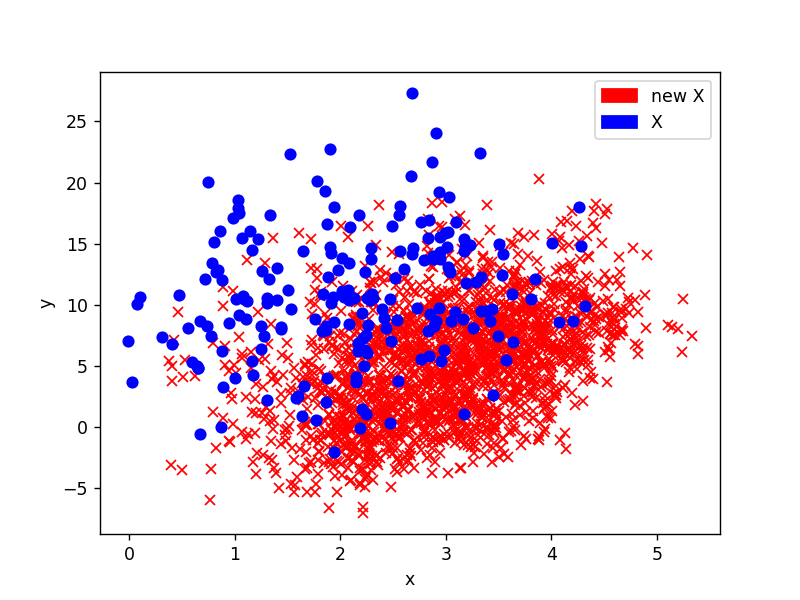

In [12]:
#plot of the first two variables
import matplotlib.patches as mpatches
plt.figure()
plt.plot(df_plom.iloc[:,1].to_numpy(), df_plom.iloc[:,2].to_numpy(), 'rx')
plt.plot(df_initial.iloc[:,1].to_numpy(), df_initial.iloc[:,2].to_numpy(), 'bo')
plt.xlabel('x')
plt.ylabel('y')
red_patch = mpatches.Patch(color='red', label='new X')
blue_patch = mpatches.Patch(color='blue', label='X')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

<IPython.core.display.Javascript object>


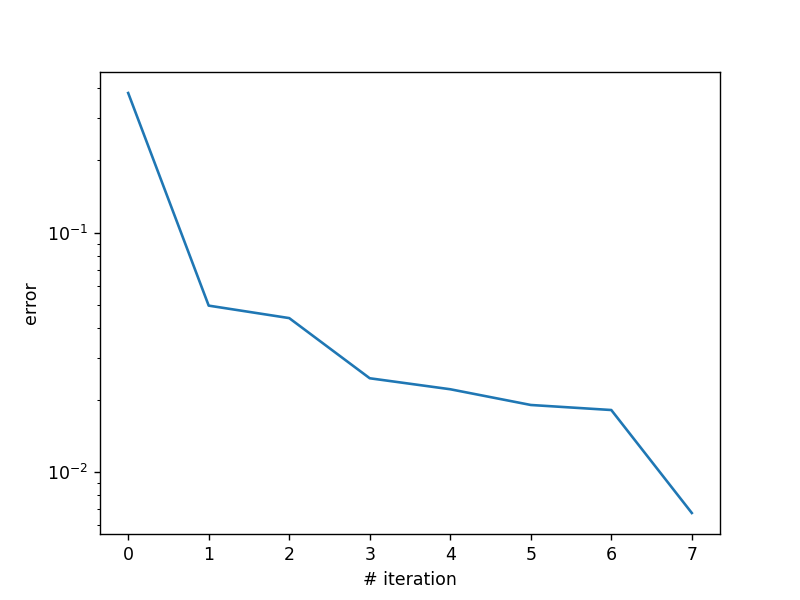

In [13]:
import matplotlib.patches as mpatches
plt.figure()
plt.plot(model.errors)
plt.xlabel('# iteration')
plt.ylabel('error')
plt.semilogy()
plt.show()

In [14]:
model.errors

[0.3822549325026647,
 0.049555814348898865,
 0.0439612630080758,
 0.024661524664337776,
 0.022190696891033403,
 0.019079117023277244,
 0.018176451589225436,
 0.00675785600343866]

In [15]:
local_minima_counter

NameError: name 'local_minima_counter' is not defined